In [4]:
import time
import numpy as np
from numpy.typing import NDArray
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
from warnings import filterwarnings
filterwarnings("ignore")

2x1-x2-x3=1   
3x1-4x2+x3=2  
x1-x2-x3=3   

2x1-x2-x3-1=0  
3x1-4x2+x3-2=0  
x1-x2-x3-3=0  

x1 = 3x1-x2-x3-1  
x2 = 3x1-3x2+x3-2  
x3 = x1-x2-3  

3*x1-1*x2-1*x3-1 = 0 - 0 -0 - 1 = -1     
3*x1-3*x2+1*x3-2 = 0 - 0 + 0 -2 = -2     
1*x1-1*x2-3 = 0 -0 -3 =           -3    

-4.64*x1 + 1.13*x2 -8.88*x3 + 3.75 = 0   
7.61*x1 + 6.25*x2 - 2.32*x3 - 2.33 = 0   
-9.11*x1 +1.02*x2 - 0.73*x3 + 1.2 = 0   

-3.64*x1 + 1.13*x2 -8.88*x3 + 3.75 = x1   
7.61*x1 + 7.25*x2 - 2.32*x3 - 2.33 = x2   
-9.11*x1 +1.02*x2 + 0.27*x3 + 1.2 = x3   

In [5]:
eps = 1e-2

A = np.array([
    [-4.64, 1.13, -8.88],
    [7.61, 6.25, -2.32],
    [-9.11, 1.02, -0.73],
])
     
B = np.array([
    -3.75,
    2.33,
    -1.25,
])

In [30]:
def predominance_of_diagonal_elements(A: NDArray) -> bool:
    row1_ok = abs(A[0][0]) >= abs(A[0][1]) + abs(A[0][2])
    row2_ok = abs(A[1][1]) >= abs(A[1][0]) + abs(A[1][2])
    row3_ok = abs(A[2][2]) >= abs(A[2][0]) + abs(A[2][1])
    result = row1_ok and row2_ok and row3_ok
    if not result:
        print("Сходимость не гарантированна!")
    return result
    
predominance_of_diagonal_elements(A)

Сходимость не гарантированна!


np.False_

In [20]:
def sorting_by_the_predominance_of_diagonal(A: NDArray) -> NDArray:
    x1_max, x2_max, x3_max = None, None, None
    for i_id, i in enumerate(np.abs(A.T)):
        if i_id == 0:
            x1_max = A[np.argmax(i)]
        if i_id == 1:
            x2_max = A[np.argmax(i)]
        if i_id == 2:
            x3_max = A[np.argmax(i)]
    return np.array([x1_max, x2_max, x3_max])

sorting_by_the_predominance_of_diagonal(A)

array([[-9.11,  1.02, -0.73],
       [ 7.61,  6.25, -2.32],
       [-4.64,  1.13, -8.88]])

In [31]:
errors = {}
solutions_history: dict[str, list[float]] = {'x0': [], 'x1': [], 'x2': []}

def iteration_method(A: np.ndarray, B: np.ndarray, eps=1e-6):
    global errors, solutions_history
    
    errors = {}
    solutions_history = {'x0': [], 'x1': [], 'x2': []}
    
    if not predominance_of_diagonal_elements(A):
        A = sorting_by_the_predominance_of_diagonal(A)
    
    x_old = np.zeros(len(B))
    error = np.inf
    count = 0
    
    while error > eps:
        x_new = np.zeros(len(B))
        
        # вычисляем новые значения для каждой переменной
        for i in range(len(A)):
            sum_other = 0
            for j in range(len(A)):
                if i != j:
                    sum_other += A[i][j] * x_old[j]
            
            x_new[i] = (B[i] - sum_other) / A[i][i]
        
        # вычисляем ошибку 
        error = np.max(np.abs(x_new - x_old))
        
        errors[count] = error
        solutions_history['x0'].append(x_new[0])
        solutions_history['x1'].append(x_new[1])
        solutions_history['x2'].append(x_new[2])
        
        x_old = x_new.copy()
        
        print(f"Итерация {count}: x0={x_new[0]:.6f}, x1={x_new[1]:.6f}, x2={x_new[2]:.6f}, error={error:.6e}")
        count += 1
            
    return x_old

Сходимость не гарантированна!
Итерация 0: x0=0.411636, x1=0.372800, x2=0.140766, error=4.116356e-01
Итерация 1: x0=0.442096, x1=-0.076155, x2=-0.026883, error=4.489552e-01
Итерация 2: x0=0.405263, x1=-0.175476, x2=-0.099930, error=9.932034e-02
Итерация 3: x0=0.399996, x1=-0.157742, x2=-0.093323, error=1.773306e-02
Итерация 4: x0=0.401452, x1=-0.148877, x2=-0.088314, error=8.865792e-03

Результат: x0=0.401452, x1=-0.148877, x2=-0.088314
Количество итераций: 5
Финальная ошибка: 8.87e-03


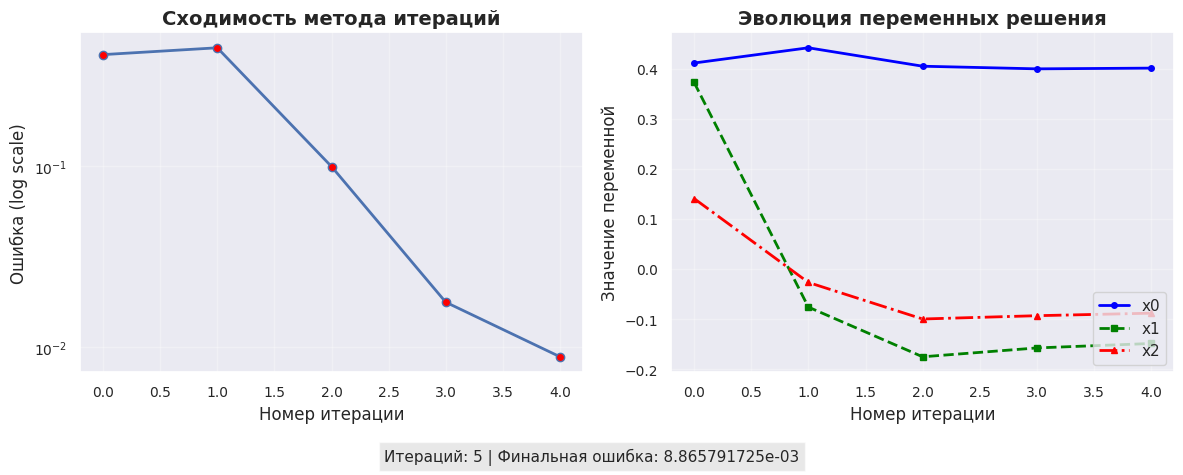

In [32]:
def plot_convergence_analysis():
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # график ошибки по итерациям (логарифмическая шкала)
    iterations = list(errors.keys())
    error_values = list(errors.values())
    
    ax1.semilogy(iterations, error_values, 'b-o', linewidth=2, markersize=6, markerfacecolor='red')
    ax1.set_xlabel('Номер итерации', fontsize=12)
    ax1.set_ylabel('Ошибка (log scale)', fontsize=12)
    ax1.set_title('Сходимость метода итераций', fontsize=14, fontweight='bold')
    ax1.grid(True, alpha=0.3)
    ax1.tick_params(axis='both', which='major', labelsize=10)
    
    # график изменения переменных
    colors = ['blue', 'green', 'red']
    line_styles = ['-', '--', '-.']
    
    for i, (var_name, values) in enumerate(solutions_history.items()):
        ax2.plot(range(len(values)), values, 
                color=colors[i], 
                linestyle=line_styles[i], 
                linewidth=2, 
                marker='o' if i == 0 else 's' if i == 1 else '^',
                markersize=4,
                label=var_name)
    
    ax2.set_xlabel('Номер итерации', fontsize=12)
    ax2.set_ylabel('Значение переменной', fontsize=12)
    ax2.set_title('Эволюция переменных решения', fontsize=14, fontweight='bold')
    ax2.legend(fontsize=11, loc='lower right')
    ax2.grid(True, alpha=0.3)
    ax2.tick_params(axis='both', which='major', labelsize=10)
    
    if error_values:
        final_error = error_values[-1]
        convergence_rate = error_values[-1] / error_values[-2] if len(error_values) > 1 else 0
        plt.figtext(0.5, 0.01, 
                   f"Итераций: {len(errors)} | Финальная ошибка: {final_error:.9e}", 
                   ha='center', fontsize=11, bbox=dict(facecolor='lightgray', alpha=0.5))
    
    plt.tight_layout(rect=[0, 0.05, 1, 0.95])
    plt.show()

solution = iteration_method(A, B, eps)
print(f"\nРезультат: x0={solution[0]:.6f}, x1={solution[1]:.6f}, x2={solution[2]:.6f}")
print(f"Количество итераций: {len(errors)}")
print(f"Финальная ошибка: {list(errors.values())[-1]:.2e}")
plot_convergence_analysis()

In [33]:
errors_seidel = {}
solutions_history_seidel: dict[str, list[float]] = {'x0': [], 'x1': [], 'x2': []}

def seidel_method(A: np.ndarray, B: np.ndarray, eps=1e-6):
    global errors_seidel, solutions_history_seidel
    
    errors_seidel = {}
    solutions_history_seidel = {'x0': [], 'x1': [], 'x2': []}
    
    if not predominance_of_diagonal_elements(A):
        A = sorting_by_the_predominance_of_diagonal(A)
    
    x = np.zeros(len(B))
    error = np.inf
    count = 0
    
    while error > eps:
        x_old = x.copy()
        
        # ВЫЧИСЛЯЕМ НОВЫЕ ЗНАЧЕНИЯ С ИСПОЛЬЗОВАНИЕМ УЖЕ ОБНОВЛЕННЫХ ПЕРЕМЕННЫХ
        for i in range(len(A)):
            sum_before = 0  # сумма для уже обновленных переменных (j < i)
            sum_after = 0   # сумма для еще не обновленных переменных (j > i)
            
            for j in range(len(A)):
                if i != j:
                    if j < i:
                        sum_before += A[i][j] * x[j]  # используем новые значения
                    else:
                        sum_after += A[i][j] * x_old[j]  # используем старые значения
            
            x[i] = (B[i] - sum_before - sum_after) / A[i][i]
        
        error = np.max(np.abs(x - x_old))
        
        errors_seidel[count] = error
        solutions_history_seidel['x0'].append(x[0])
        solutions_history_seidel['x1'].append(x[1])
        solutions_history_seidel['x2'].append(x[2])
        
        print(f"Зейдель {count}: x0={x[0]:.6f}, x1={x[1]:.6f}, x2={x[2]:.6f}, error={error:.6e}")
        count += 1
            
    return x

МЕТОД ПРОСТОЙ ИТЕРАЦИИ
Сходимость не гарантированна!
Итерация 0: x0=0.411636, x1=0.372800, x2=0.140766, error=4.116356e-01
Итерация 1: x0=0.442096, x1=-0.076155, x2=-0.026883, error=4.489552e-01
Итерация 2: x0=0.405263, x1=-0.175476, x2=-0.099930, error=9.932034e-02
Итерация 3: x0=0.399996, x1=-0.157742, x2=-0.093323, error=1.773306e-02
Итерация 4: x0=0.401452, x1=-0.148877, x2=-0.088314, error=8.865792e-03

МЕТОД ЗЕЙДЕЛЯ
Сходимость не гарантированна!
Зейдель 0: x0=0.411636, x1=-0.128407, x2=-0.090663, error=4.116356e-01
Зейдель 1: x0=0.404523, x1=-0.153402, x2=-0.090128, error=2.499447e-02
Зейдель 2: x0=0.401682, x1=-0.149743, x2=-0.088177, error=3.658549e-03

СРАВНЕНИЕ РЕЗУЛЬТАТОВ
Метод итераций: [ 0.40145208 -0.1488767  -0.08831427]
Метод Зейделя:  [ 0.40168202 -0.14974338 -0.08817732]
Разница:        [0.00022994 0.00086669 0.00013696]


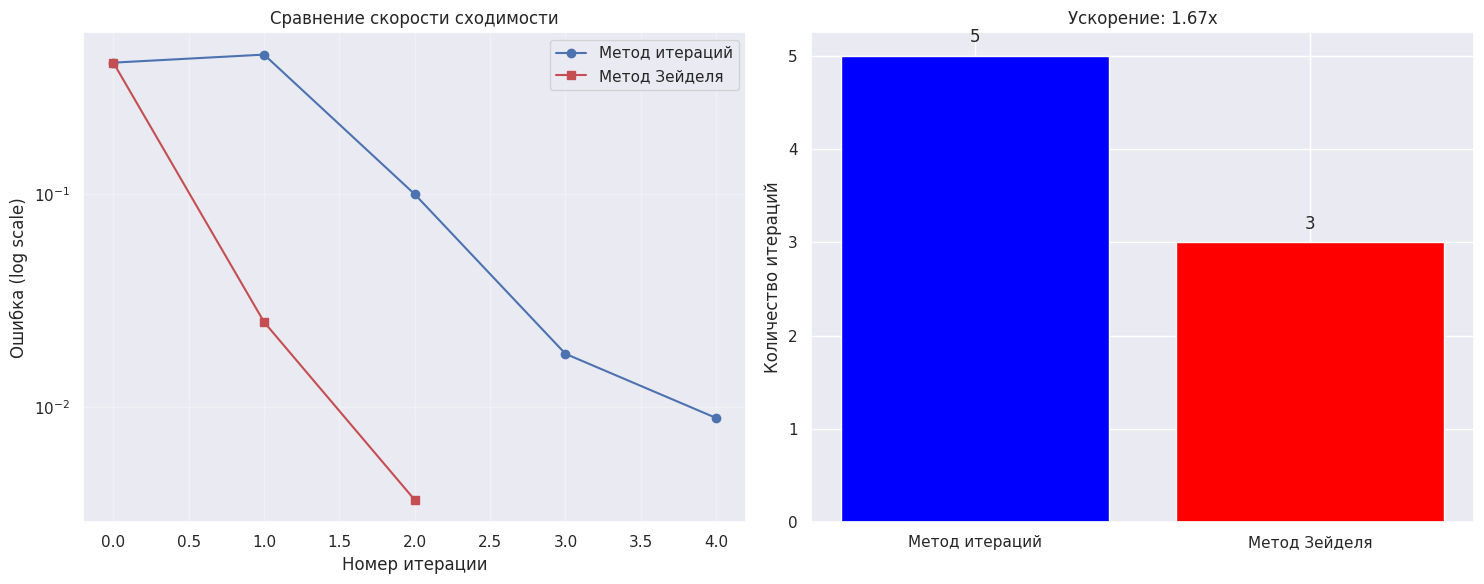

In [34]:
def compare_methods(A, B, eps=eps):
    print("=" * 50)
    print("МЕТОД ПРОСТОЙ ИТЕРАЦИИ")
    print("=" * 50)
    result_iter = iteration_method(A, B, eps)
    
    print("\n" + "=" * 50)
    print("МЕТОД ЗЕЙДЕЛЯ")
    print("=" * 50)
    result_seidel = seidel_method(A, B, eps)
    
    # Сравнение результатов
    print("\n" + "=" * 50)
    print("СРАВНЕНИЕ РЕЗУЛЬТАТОВ")
    print("=" * 50)
    print(f"Метод итераций: {result_iter}")
    print(f"Метод Зейделя:  {result_seidel}")
    print(f"Разница:        {np.abs(result_iter - result_seidel)}")
    
    # Построение графиков сравнения
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # График ошибок
    ax1.semilogy(list(errors.keys()), list(errors.values()), 'b-o', 
                label='Метод итераций', markersize=6)
    ax1.semilogy(list(errors_seidel.keys()), list(errors_seidel.values()), 'r-s', 
                label='Метод Зейделя', markersize=6)
    ax1.set_xlabel('Номер итерации')
    ax1.set_ylabel('Ошибка (log scale)')
    ax1.set_title('Сравнение скорости сходимости')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # График количества итераций
    methods = ['Метод итераций', 'Метод Зейделя']
    iterations = [len(errors), len(errors_seidel)]
    speedup = iterations[0] / iterations[1]
    
    bars = ax2.bar(methods, iterations, color=['blue', 'red'])
    ax2.set_ylabel('Количество итераций')
    ax2.set_title(f'Ускорение: {speedup:.2f}x')
    
    # Добавляем значения на столбцы
    for bar, value in zip(bars, iterations):
        ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                f'{value}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
    
    return result_iter, result_seidel


result_iter, result_seidel = compare_methods(A, B, eps)

In [35]:
def inverse_matrix_method(A: np.ndarray, B: np.ndarray) -> np.ndarray:
        # проверяем, что матрица определитель 0
        det = np.linalg.det(A)
        if np.isclose(det, 0):
            raise ValueError("Матрица вырождена (определитель = 0), обратной матрицы не существует")
        A_inv = np.linalg.inv(A)
        
        # умножаем обратную матрицу на вектор правых частей
        x = np.dot(A_inv, B)
        
        return x

СРАВНЕНИЕ МЕТОДОВ РЕШЕНИЯ СЛАУ

1. МЕТОД ОБРАТНОЙ МАТРИЦЫ
------------------------------
Решение: [0.14422921 0.34212936 0.39047102]
Время выполнения: 0.000219 сек
Невязка: 8.88e-16

2. МЕТОД ПРОСТОЙ ИТЕРАЦИИ
------------------------------
Сходимость не гарантированна!
Итерация 0: x0=0.411636, x1=0.372800, x2=0.140766, error=4.116356e-01
Итерация 1: x0=0.442096, x1=-0.076155, x2=-0.026883, error=4.489552e-01
Итерация 2: x0=0.405263, x1=-0.175476, x2=-0.099930, error=9.932034e-02
Итерация 3: x0=0.399996, x1=-0.157742, x2=-0.093323, error=1.773306e-02
Итерация 4: x0=0.401452, x1=-0.148877, x2=-0.088314, error=8.865792e-03
Решение: [ 0.40145208 -0.1488767  -0.08831427]
Время выполнения: 0.000650 сек
Итераций: 5
Финальная ошибка: 8.87e-03

3. МЕТОД ЗЕЙДЕЛЯ
------------------------------
Сходимость не гарантированна!
Зейдель 0: x0=0.411636, x1=-0.128407, x2=-0.090663, error=4.116356e-01
Зейдель 1: x0=0.404523, x1=-0.153402, x2=-0.090128, error=2.499447e-02
Зейдель 2: x0=0.401682, x1=-0.1497

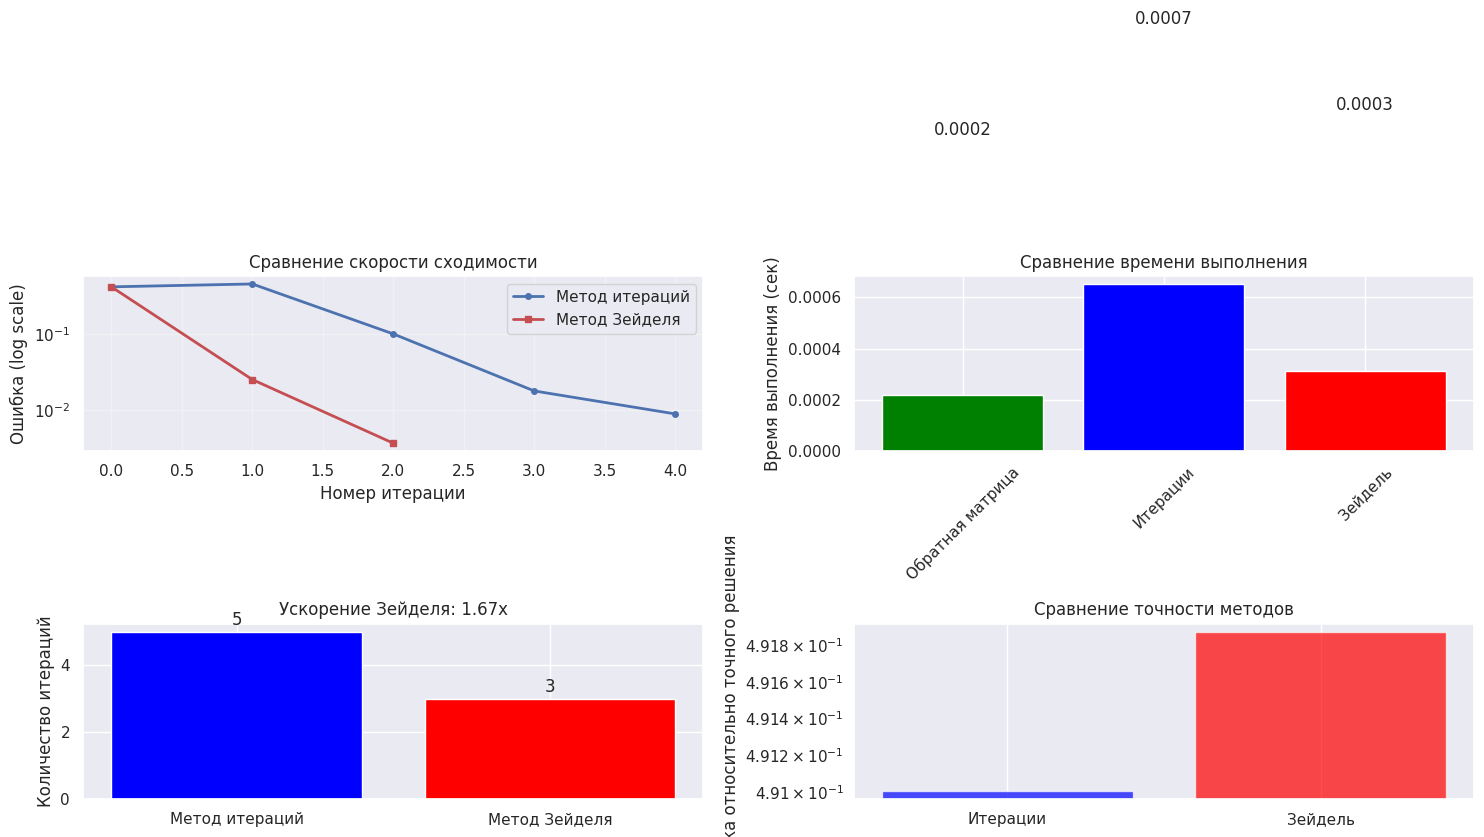

In [37]:
def compare_all_methods(A, B, eps=1e-6):
    print("=" * 60)
    print("СРАВНЕНИЕ МЕТОДОВ РЕШЕНИЯ СЛАУ")
    print("=" * 60)
    
    print("\n1. МЕТОД ОБРАТНОЙ МАТРИЦЫ")
    print("-" * 30)
    start_time = time.time()
    x_inv = inverse_matrix_method(A, B)
    inv_time = time.time() - start_time
    
    if x_inv is not None:
        print(f"Решение: {x_inv}")
        print(f"Время выполнения: {inv_time:.6f} сек")
        print(f"Невязка: {np.max(np.abs(np.dot(A, x_inv) - B)):.2e}")
    
    print("\n2. МЕТОД ПРОСТОЙ ИТЕРАЦИИ")
    print("-" * 30)
    start_time = time.time()
    x_iter = iteration_method(A, B, eps)
    iter_time = time.time() - start_time
    
    print(f"Решение: {x_iter}")
    print(f"Время выполнения: {iter_time:.6f} сек")
    print(f"Итераций: {len(errors)}")
    print(f"Финальная ошибка: {list(errors.values())[-1]:.2e}")
    
    print("\n3. МЕТОД ЗЕЙДЕЛЯ")
    print("-" * 30)
    start_time = time.time()
    x_seidel = seidel_method(A, B, eps)
    seidel_time = time.time() - start_time
    
    print(f"Решение: {x_seidel}")
    print(f"Время выполнения: {seidel_time:.6f} сек")
    print(f"Итераций: {len(errors_seidel)}")
    print(f"Финальная ошибка: {list(errors_seidel.values())[-1]:.2e}")
    
    print("\n" + "=" * 60)
    print("СРАВНЕНИЕ ТОЧНОСТИ")
    print("=" * 60)
    
    if x_inv is not None:
        print(f"Разница с обратной матрицей:")
        print(f"Метод итераций: {np.max(np.abs(x_iter - x_inv)):.2e}")
        print(f"Метод Зейделя:  {np.max(np.abs(x_seidel - x_inv)):.2e}")
    
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
    
    ax1.semilogy(list(errors.keys()), list(errors.values()), 'b-o', 
                label='Метод итераций', markersize=4, linewidth=2)
    ax1.semilogy(list(errors_seidel.keys()), list(errors_seidel.values()), 'r-s', 
                label='Метод Зейделя', markersize=4, linewidth=2)
    ax1.set_xlabel('Номер итерации')
    ax1.set_ylabel('Ошибка (log scale)')
    ax1.set_title('Сравнение скорости сходимости')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # cравнение времени выполнения
    methods = ['Обратная матрица', 'Итерации', 'Зейдель']
    times = [inv_time, iter_time, seidel_time]
    colors = ['green', 'blue', 'red']
    
    bars = ax2.bar(methods, times, color=colors)
    ax2.set_ylabel('Время выполнения (сек)')
    ax2.set_title('Сравнение времени выполнения')
    ax2.tick_params(axis='x', rotation=45)
    
    for bar, time_val in zip(bars, times):
        ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001,
                f'{time_val:.4f}', ha='center', va='bottom')
    
    # cравнение количества итераций
    iter_methods = ['Метод итераций', 'Метод Зейделя']
    iter_counts = [len(errors), len(errors_seidel)]
    speedup = iter_counts[0] / iter_counts[1] if iter_counts[1] > 0 else 0
    
    bars = ax3.bar(iter_methods, iter_counts, color=['blue', 'red'])
    ax3.set_ylabel('Количество итераций')
    ax3.set_title(f'Ускорение Зейделя: {speedup:.2f}x')
    
    for bar, count in zip(bars, iter_counts):
        ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                f'{count}', ha='center', va='bottom')
    
    # cравнение точности (если есть точное решение)
    if x_inv is not None:
        errors_compare = [
            np.max(np.abs(x_iter - x_inv)),
            np.max(np.abs(x_seidel - x_inv))
        ]
        
        ax4.bar(['Итерации', 'Зейдель'], errors_compare, 
               color=['blue', 'red'], alpha=0.7)
        ax4.set_ylabel('Ошибка относительно точного решения')
        ax4.set_title('Сравнение точности методов')
        ax4.set_yscale('log')
    
    plt.tight_layout()
    plt.show()
    
    return x_inv, x_iter, x_seidel

x_inv, x_iter, x_seidel = compare_all_methods(A, B, eps)

In [14]:
def orto_method(A, B):
    Q, R = np.linalg.qr(A)
    Y = np.dot(Q.T, B) 
    X = np.linalg.solve(R, Y)
    return X

In [17]:
result = orto_method(A, B)
result

1 (array([[12.74495194,  2.59138678,  2.36943224],
       [ 0.        , -5.88765781,  5.33643706],
       [ 0.        ,  0.        ,  7.11884333]]), <built-in method __array_wrap__ of numpy.ndarray object at 0x7fbea5776c70>)
1 (array([3.64997846, 0.06938344, 2.779702  ]), <built-in method __array_wrap__ of numpy.ndarray object at 0x7fbea5776790>)
1 (<class 'numpy.float64'>, <class 'numpy.float64'>)


array([0.14422921, 0.34212936, 0.39047102])

In [10]:
eps = 1e-2

A = np.array([
    [-9.11, 1.02, -0.73],
    [7.61, 6.25, -2.32],
    [-4.64, 1.13, -8.88],
])
     
B = np.array([
    -1.25,
    2.33,
    -3.75,

])
np.linalg.solve(A, B)
0.14433097, 0.34222188, 0.3879784

array([0.14422921, 0.34212936, 0.39047102])

In [14]:
def monte_carlo_method(A, B, samples=1000):
    n = len(B)
    X_samples = []

    for _ in range(samples):
        # Случайное начальное приближение
        X_rand = np.random.uniform(-1, 1, size=n)
        # Вычисляем приближение X
        X_approx = np.linalg.inv(A) @ B + X_rand
        X_samples.append(X_approx)
        # print(X_samples)
    X_mean = np.mean(X_samples, axis=0)
    return X_mean

In [16]:
%%time
monte_carlo_method(A, B, samples=100_000)

CPU times: user 2.16 s, sys: 34 ms, total: 2.2 s
Wall time: 2.01 s


array([0.14433097, 0.34222188, 0.38797845])

QR-разложение (QR-факторизация) можно выполнить с помощью процесса Грама-Шмидта. Этот метод позволяет разложить матрицу на две составляющие: ортогональную матрицу Q и верхнюю треугольную матрицу R (A = QR)

In [17]:
np.linalg.solve(A, B)

array([0.14422921, 0.34212936, 0.39047102])

In [19]:
def qr_gram_schmidt(A):
    """QR-разложение через процесс Грама-Шмидта
    
    Параметры:
    A - входная матрица размером m×n (m >= n)
    
    Возвращает:
    Q - ортонормированная матрица размером m×n (Q^T @ Q = I)
    R - верхняя треугольная матрица размером n×n
    """
    m, n = A.shape
    
    Q = np.zeros((m, n))
    R = np.zeros((n, n))
    for j in range(n):
        # Берем j-ый столбец матрицы A как начальный вектор
        v = A[:, j]
        
        # Ортогонализация: вычитаем проекции на все предыдущие ортонормированные векторы
        for i in range(j):
            # Вычисляем скалярное произведение i-го ортонормированного вектора 
            # и j-го столбца исходной матрицы
            R[i, j] = np.dot(Q[:, i], A[:, j])
            
            # Вычитаем проекцию текущего вектора на i-ое ортонормированное направление
            # Тем самым делаем вектор v ортогональным ко всем предыдущим Q[:,i]
            v = v - R[i, j] * Q[:, i]
        
        # Нормировка: после ортогонализации получаем длину вектора
        R[j, j] = np.linalg.norm(v)
        
        # Создаем j-ый ортонормированный вектор
        # Делим ортогонализованный вектор на его длину
        Q[:, j] = v / R[j, j]
    
    return Q, R


def orto_method(A, B):
    Q, R = np.linalg.qr(A) # отражения Хаусхолдера или вращения Гивенса
    # Q, R = qr_gram_schmidt(A)
    Y = np.dot(Q.T, B) 
    X = np.linalg.solve(R, Y)
    return X

orto_method(A, B)

array([0.14422921, 0.34212936, 0.39047102])

# 

In [21]:
import numpy as np

def is_diagonally_dominant(A):
    n = len(A)
    for i in range(n):
        diagonal = abs(A[i][i])
        sum_off_diagonal = sum(abs(A[i][j]) for j in range(n) if j != i)
        if diagonal <= sum_off_diagonal:
            return False
    return True

def make_diagonally_dominant(A, b, max_iterations=100):
    n = A.shape[0]
    A_new = A.copy().astype(float)
    b_new = b.copy().astype(float)

    for iteration in range(max_iterations):
        changed = False

        for j in range(n):
            # Находим строку с максимальным элементом в столбце j
            max_index = np.argmax(np.abs(A_new[:, j]))
            max_value = np.abs(A_new[max_index, j])

            if max_value < 1e-10:
                continue

            # Если максимальный элемент не на диагонали, меняем строки местами
            if max_index != j:
                A_new[[j, max_index], :] = A_new[[max_index, j], :]
                b_new[[j, max_index]] = b_new[[max_index, j]]
                changed = True
                max_index = j

            # Обнуляем элементы в столбце j для всех строк, кроме текущей
            for i in range(n):
                if i == max_index:
                    continue

                multiplier = A_new[i, j] / A_new[max_index, j]

                if np.abs(multiplier) < 1e-10:
                    continue

                A_new[i, :] = A_new[i, :] - multiplier * A_new[max_index, :]
                b_new[i] = b_new[i] - multiplier * b_new[max_index]
                changed = True

        if is_diagonally_dominant(A_new.tolist()):
            print(f"Преобразование успешно завершено на итерации {iteration + 1}")
            return A_new, b_new

        if not changed:
            print("Преобразование остановилось: дальнейшие изменения невозможны.")
            break

    print(f"Достигнуто максимальное количество итераций ({max_iterations}).")
    return A_new, b_new

def monte_carlo_method(A, b, num_walks=10000, max_steps=1000):
    n = len(b)

    # Нормировка системы
    D = np.diag(A)
    H = np.zeros_like(A, dtype=float)
    for i in range(n):
        for j in range(n):
            if i != j:
                H[i, j] = -A[i, j] / D[i]

    f = b / D

    # Предварительное вычисление сумм для каждого состояния
    S = np.sum(np.abs(H), axis=1)

    # Построение матрицы переходных вероятностей
    P = np.zeros_like(A, dtype=float)
    for i in range(n):
        if S[i] > 1e-10:  # Избегаем деления на ноль
            P[i] = np.abs(H[i]) / S[i]
        else:
            P[i, i] = 1.0  # Поглощающее состояние

    # Проверка корректности матрицы переходов
    for i in range(n):
        if np.sum(P[i]) < 0.99:  # Допускаем небольшую погрешность
            P[i] /= np.sum(P[i])  # Нормируем

    # Решение системы
    x = np.zeros(n)
    for i in range(n):
        estimates = []
        for _ in range(num_walks):
            current_state = i
            weight = 1.0
            estimate = 0.0

            for step in range(max_steps):
                # Добавляем вклад текущего состояния
                estimate += weight * f[current_state]

                # Проверяем поглощающее состояние
                if S[current_state] < 1e-10:
                    break

                # Выбираем следующее состояние
                next_state = np.random.choice(n, p=P[current_state])

                # Обновляем вес
                weight *= np.sign(H[current_state, next_state]) * S[current_state]

                # Переходим к следующему состоянию
                current_state = next_state

                # Проверяем условие остановки
                if abs(weight) < 1e-10:
                    break

            estimates.append(estimate)

        # Усредняем результаты
        x[i] = np.mean(estimates)

    return x, n*num_walks

def orthogonalization_method(A, b):
    n = len(A)
    A_arr = np.array(A).astype(float)
    b_arr = np.array(b).astype(float)

    # Ортогонализация матрицы A
    Q = np.zeros((n, n))
    R = np.zeros((n, n))

    print("Метод ортогонализации (Грама-Шмидта):")
    print("Процесс ортогонализации...")

    for j in range(n):
        # Берем j-й столбец матрицы A
        v = A_arr[:, j].copy()

        # Ортогонализуем относительно предыдущих столбцов
        for i in range(j):
            R[i, j] = np.dot(Q[:, i], A_arr[:, j])
            v -= R[i, j] * Q[:, i]

        # Нормализуем
        R[j, j] = np.linalg.norm(v)
        if R[j, j] > 1e-10:
            Q[:, j] = v / R[j, j]
        else:
            Q[:, j] = v

    # Решаем систему R x = Q^T b
    Qt_b = np.dot(Q.T, b_arr)
    x = np.zeros(n)

    # Обратный ход
    for i in range(n-1, -1, -1):
        if abs(R[i, i]) > 1e-10:
            x[i] = (Qt_b[i] - np.dot(R[i, i+1:], x[i+1:])) / R[i, i]
        else:
            x[i] = 0.0

    return x.tolist(), n

def exact_solution(A, b):
    try:
        return np.linalg.solve(np.array(A), np.array(b))
    except np.linalg.LinAlgError:
        print("Невозможно найти точное решение: матрица вырождена.")
        return None

def print_matrix(A, b, title="Матрица"):
    n = len(A)
    print(f"\n{title}:")
    for i in range(n):
        row_str = " ".join([f"{A[i][j]:10.6f}" for j in range(n)])
        print(f"{row_str} | {b[i]:10.6f}")

def main():
    n = int(input("Размер матрицы: "))

    print(f"\nВведите матрицу {n}x{n}:")
    A = []
    for i in range(n):
        while True:
            row_input = input(f"Строка {i+1}: ")
            row = list(map(float, row_input.split()))
            if len(row) == n:
                A.append(row)
                break
            print(f"Ошибка: Ожидалось {n} чисел, получено {len(row)}. Попробуйте снова.")

    print("\nВведите вектор b:")
    b = list(map(float, input().split()))
    if len(b) != n:
        print(f"Ошибка: Ожидалось {n} чисел для вектора b, получено {len(b)}.")
        return

    print_matrix(A, b, "Исходная матрица")

    if not is_diagonally_dominant(A):
        print("\nМатрица не имеет диагонального преобладания. Выполняется преобразование")
        A_np = np.array(A)
        b_np = np.array(b)
        A_np, b_np = make_diagonally_dominant(A_np, b_np)
        A = A_np.tolist()
        b = b_np.tolist()

        print_matrix(A, b, "Преобразованная матрица")

        if is_diagonally_dominant(A):
            print("Преобразование успешно. Матрица теперь имеет диагональное преобладание.")
        else:
            print("Преобразование завершено, но матрица все еще не имеет диагонального преобладания.")
    else:
        print("\nМатрица имеет диагональное преобладание. Преобразование не требуется.")

    exact = exact_solution(A, b)
    if exact is not None:
        print(f"\nТочное решение: {[f'{x:.8f}' for x in exact]}")

    print("\nВыберите метод:")
    print("1 - Метод Монте-Карло")
    print("2 - Метод ортогонализации")
    choice = input("Введите 1 или 2: ")

    if choice == "1":
        num_samples = int(input("Количество samples: "))
        solution, iterations = monte_carlo_method(np.array(A), np.array(b), num_samples)
        method = "Монте-Карло"
    else:
        solution, iterations = orthogonalization_method(A, b)
        method = "ортогонализации"

    print(f"\nРезультат ({method}):")
    for i, x in enumerate(solution):
        print(f"x[{i+1}] = {x:.8f}")
    print(f"Количество итераций/шагов: {iterations}")

    if exact is not None:
        error = np.max(np.abs(np.array(solution) - exact))
        print(f"Максимальная погрешность по сравнению с точным решением: {error:.8f}")

if __name__ == "__main__":
    main()


Введите матрицу 3x3:

Введите вектор b:

Исходная матрица:
  9.740000 -10.000000   1.710000 |  -5.310000
  0.160000  -0.440000  -0.880000 |  -1.270000
  0.980000   0.880000  -0.240000 |   1.360000

Матрица не имеет диагонального преобладания. Выполняется преобразование
Достигнуто максимальное количество итераций (100).

Преобразованная матрица:
  2.347018  -0.523509   0.000000 |   0.614737
  5.172398  -5.586199   0.000000 |  -4.002632
  9.740000 -10.000000   1.710000 |  -5.310000
Преобразование завершено, но матрица все еще не имеет диагонального преобладания.

Точное решение: ['0.53151936', '1.20866823', '0.93548758']

Выберите метод:
1 - Метод Монте-Карло
2 - Метод ортогонализации
Метод ортогонализации (Грама-Шмидта):
Процесс ортогонализации...

Результат (ортогонализации):
x[1] = 0.53151936
x[2] = 1.20866823
x[3] = 0.93548758
Количество итераций/шагов: 3
Максимальная погрешность по сравнению с точным решением: 0.00000000


https://elib.bsu.by/bitstream/123456789/52531/1/42-47.pdf?ysclid=mfmrezy7om661167865